# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import copy
import time

# Load Dataset

In [2]:
original_wavedata=pd.read_csv('data files/townsville-wavedata-1975-2019.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
original_wavedata['Date/Time']=pd.to_datetime(original_wavedata['Date/Time'])
original_wavedata=original_wavedata.set_index(pd.DatetimeIndex(original_wavedata['Date/Time']))

# Function Definitions

In [4]:
def normalise_dataframe(dataframe):
    x=copy.deepcopy(dataframe)
    min_max_scaler=preprocessing.MinMaxScaler()
    x_scaled=min_max_scaler.fit_transform(x)
    normalised_dataframe=pd.DataFrame(x_scaled, columns=dataframe.columns, index=dataframe.index)
    return normalised_dataframe

# Remove Outliers

In [5]:
wavedata_adjusted=copy.deepcopy(original_wavedata)
wavedata_adjusted['Hs']=wavedata_adjusted['Hs'][wavedata_adjusted.drop(["Date/Time", "Hmax", "Tz", "Tp", "Dir_Tp TRUE", "SST"], axis=1).apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
wavedata_adjusted['Hmax']=wavedata_adjusted['Hmax'][wavedata_adjusted.drop(["Date/Time", "Hs", "Tz", "Tp", "Dir_Tp TRUE", "SST"], axis=1).apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
wavedata_adjusted['Tz']=wavedata_adjusted['Tz'][wavedata_adjusted.drop(["Date/Time", "Hs", "Hmax", "Tp", "Dir_Tp TRUE", "SST"], axis=1).apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
wavedata_adjusted['Tp']=wavedata_adjusted['Tp'][wavedata_adjusted.drop(["Date/Time", "Hs", "Hmax", "Tz", "Dir_Tp TRUE", "SST"], axis=1).apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
wavedata_adjusted=wavedata_adjusted.drop(["Date/Time", "Dir_Tp TRUE", "SST"], axis=1).dropna()

# Variable Declarations

## Direction True North

In [6]:
original_dir_tp_months={}
for i in range(1, 13):
    original_dir_tp_months[i]=original_wavedata[original_wavedata["Date/Time"].dt.month==i].drop(["Date/Time", "Hs", "Hmax", "Tz", "Tp", "SST"], axis=1)

In [7]:
original_dir_tp_summer=original_dir_tp_months[1].append(original_dir_tp_months[2].append(original_dir_tp_months[12]))
original_dir_tp_autumn=original_dir_tp_months[3].append(original_dir_tp_months[4].append(original_dir_tp_months[5]))
original_dir_tp_winter=original_dir_tp_months[6].append(original_dir_tp_months[7].append(original_dir_tp_months[8]))
original_dir_tp_spring=original_dir_tp_months[9].append(original_dir_tp_months[10].append(original_dir_tp_months[11]))

In [8]:
original_dir_tp_weeks={}
for i in range(1, 53):
    original_dir_tp_weeks[i]=original_wavedata[original_wavedata["Date/Time"].dt.week==i].drop(["Date/Time", "Hs", "Hmax", "Tz", "Tp", "SST"], axis=1)

## Sea Surface Temperature

In [9]:
original_sst_months={}
for i in range(1, 13):
    original_sst_months[i]=original_wavedata[original_wavedata["Date/Time"].dt.month==i].drop(["Date/Time", "Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1)

In [10]:
original_sst_summer=original_sst_months[1].append(original_sst_months[2].append(original_sst_months[12]))
original_sst_autumn=original_sst_months[3].append(original_sst_months[4].append(original_sst_months[5]))
original_sst_winter=original_sst_months[6].append(original_sst_months[7].append(original_sst_months[8]))
original_sst_spring=original_sst_months[9].append(original_sst_months[10].append(original_sst_months[11]))

In [11]:
original_sst_weeks={}
for i in range(1, 53):
    original_sst_weeks[i]=original_wavedata[original_wavedata["Date/Time"].dt.week==i].drop(["Date/Time", "Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1)

### Day

In [12]:
original_sst_months_day={}
for i in range(1, 13):
    original_sst_months_day[i]=original_sst_months[i].between_time('6:00', '18:00')

In [13]:
original_sst_summer_day=original_sst_months_day[1].append(original_sst_months_day[2].append(original_sst_months_day[12]))
original_sst_autumn_day=original_sst_months_day[3].append(original_sst_months_day[4].append(original_sst_months_day[5]))
original_sst_winter_day=original_sst_months_day[6].append(original_sst_months_day[7].append(original_sst_months_day[8]))
original_sst_spring_day=original_sst_months_day[9].append(original_sst_months_day[10].append(original_sst_months_day[11]))

In [14]:
original_sst_weeks_day={}
for i in range(1, 53):
    original_sst_weeks_day[i]=original_wavedata[original_wavedata["Date/Time"].dt.week==i].drop(["Date/Time", "Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1).between_time('6:00', '18:00')

### Night

In [15]:
original_sst_months_night={}
for i in range(1, 13):
    original_sst_months_night[i]=original_sst_months[i].between_time('18:00', '6:00')

In [16]:
original_sst_summer_night=original_sst_months_night[1].append(original_sst_months_night[2].append(original_sst_months_night[12]))
original_sst_autumn_night=original_sst_months_night[3].append(original_sst_months_night[4].append(original_sst_months_night[5]))
original_sst_winter_night=original_sst_months_night[6].append(original_sst_months_night[7].append(original_sst_months_night[8]))
original_sst_spring_night=original_sst_months_night[9].append(original_sst_months_night[10].append(original_sst_months_night[11]))

In [17]:
original_sst_weeks_night={}
for i in range(1, 53):
    original_sst_weeks_night[i]=original_wavedata[original_wavedata["Date/Time"].dt.week==i].drop(["Date/Time", "Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1).between_time('18:00', '6:00')

# Remove Outliers and Fill NULL Values

## Direction True North

### Month

#### Remove Outliers

In [18]:
dir_tp_months_removed_outliers={}
for i in range(1, 13):
    dir_tp_months_removed_outliers[i]=original_dir_tp_months[i][original_dir_tp_months[i].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

#### Calculate Means

In [19]:
dir_tp_months_mean={}
for i in range(1, 13):
    dir_tp_months_mean[i]=dir_tp_months_removed_outliers[i].mean()

#### Create Adjusted Dataframe

In [20]:
dir_tp_months_adjusted=original_wavedata.drop(["Hs", "Hmax", "Tz", "Tp", "SST"], axis=1)
for i in range(1, 13):
    dir_tp_months_adjusted[dir_tp_months_adjusted["Date/Time"].dt.month==i]=dir_tp_months_adjusted[dir_tp_months_adjusted["Date/Time"].dt.month==i].replace(np.nan, dir_tp_months_mean[i])

#### Remove Outliers from Adjusted Dataframe

In [21]:
dir_tp_months_adjusted=dir_tp_months_adjusted.drop(["Date/Time"], axis=1)
dir_tp_months_adjusted=dir_tp_months_adjusted[dir_tp_months_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

### Seasonal

#### Remove Outliers

In [22]:
dir_tp_summer_removed_outliers=original_dir_tp_summer[original_dir_tp_summer.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
dir_tp_autumn_removed_outliers=original_dir_tp_autumn[original_dir_tp_autumn.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
dir_tp_winter_removed_outliers=original_dir_tp_winter[original_dir_tp_winter.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
dir_tp_spring_removed_outliers=original_dir_tp_spring[original_dir_tp_spring.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

#### Calculate Mean

In [23]:
dir_tp_summer_mean=dir_tp_summer_removed_outliers.mean()
dir_tp_autumn_mean=dir_tp_autumn_removed_outliers.mean()
dir_tp_winter_mean=dir_tp_winter_removed_outliers.mean()
dir_tp_spring_mean=dir_tp_spring_removed_outliers.mean()

#### Create Adjusted Dataframe

In [24]:
dir_tp_summer_adjusted=original_dir_tp_summer
dir_tp_autumn_adjusted=original_dir_tp_autumn
dir_tp_winter_adjusted=original_dir_tp_winter
dir_tp_spring_adjusted=original_dir_tp_spring
dir_tp_summer_adjusted=dir_tp_summer_adjusted.replace(np.nan, dir_tp_summer_mean)
dir_tp_autumn_adjusted=dir_tp_autumn_adjusted.replace(np.nan, dir_tp_autumn_mean)
dir_tp_winter_adjusted=dir_tp_winter_adjusted.replace(np.nan, dir_tp_winter_mean)
dir_tp_spring_adjusted=dir_tp_spring_adjusted.replace(np.nan, dir_tp_spring_mean)

#### Remove Outliers from Adjusted Dataframe

In [25]:
dir_tp_summer_adjusted=dir_tp_summer_adjusted[dir_tp_summer_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
dir_tp_autumn_adjusted=dir_tp_autumn_adjusted[dir_tp_autumn_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
dir_tp_winter_adjusted=dir_tp_winter_adjusted[dir_tp_winter_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
dir_tp_spring_adjusted=dir_tp_spring_adjusted[dir_tp_spring_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
dir_tp_season_adjusted=dir_tp_summer_adjusted.append(dir_tp_autumn_adjusted.append(dir_tp_winter_adjusted.append(dir_tp_spring_adjusted)))

### Weeks

#### Remove Outliers

In [26]:
dir_tp_weeks_removed_outliers={}
for i in range(1, 53):
    dir_tp_weeks_removed_outliers[i]=original_dir_tp_weeks[i][original_dir_tp_weeks[i].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

#### Calculate Means

In [27]:
dir_tp_weeks_mean={}
for i in range(1, 53):
    dir_tp_weeks_mean[i]=dir_tp_weeks_removed_outliers[i].mean()

#### Create Adjusted Dataframe

In [28]:
dir_tp_weeks_adjusted=original_wavedata.drop(["Hs", "Hmax", "Tz", "Tp", "SST"], axis=1)
for i in range(1, 53):
    dir_tp_weeks_adjusted[dir_tp_weeks_adjusted["Date/Time"].dt.week==i]=dir_tp_weeks_adjusted[dir_tp_weeks_adjusted["Date/Time"].dt.week==i].replace(np.nan, dir_tp_weeks_mean[i])

#### Remove Outliers from Adjusted Dataframe

In [29]:
dir_tp_weeks_adjusted=dir_tp_weeks_adjusted.drop(["Date/Time"], axis=1)
dir_tp_weeks_adjusted=dir_tp_weeks_adjusted[dir_tp_weeks_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

## Sea Surface Temperature

### Day

#### Months

##### Remove Outliers

In [30]:
sst_months_day_removed_outliers={}
for i in range(1, 13):
    sst_months_day_removed_outliers[i]=original_sst_months_day[i][original_sst_months_day[i].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

##### Calculate Means

In [31]:
sst_months_day_mean={}
for i in range(1, 13):
    sst_months_day_mean[i]=sst_months_day_removed_outliers[i].mean()

##### Create Adjusted Dataframes

In [32]:
sst_months_day_adjusted=original_wavedata.drop(["Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1).between_time('6:00', '18:00')
for i in range(1, 13):
    sst_months_day_adjusted[sst_months_day_adjusted["Date/Time"].dt.month==i]=sst_months_day_adjusted[sst_months_day_adjusted["Date/Time"].dt.month==i].replace(np.nan, sst_months_day_mean[i])

##### Remove Outliers from Adjusted Dataframes

In [33]:
sst_months_day_adjusted=sst_months_day_adjusted.drop(["Date/Time"], axis=1)
sst_months_day_adjusted=sst_months_day_adjusted[sst_months_day_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

#### Seasons

##### Remove Outliers

In [34]:
sst_summer_day_removed_outliers=original_sst_summer_day[original_sst_summer_day.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_autumn_day_removed_outliers=original_sst_autumn_day[original_sst_autumn_day.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_winter_day_removed_outliers=original_sst_winter_day[original_sst_winter_day.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_spring_day_removed_outliers=original_sst_spring_day[original_sst_spring_day.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

##### Calculate Means

In [35]:
sst_summer_day_mean=sst_summer_day_removed_outliers.mean()
sst_autumn_day_mean=sst_autumn_day_removed_outliers.mean()
sst_winter_day_mean=sst_winter_day_removed_outliers.mean()
sst_spring_day_mean=sst_spring_day_removed_outliers.mean()

##### Create Adjusted Dataframes

In [36]:
sst_summer_day_adjusted=original_sst_summer_day
sst_autumn_day_adjusted=original_sst_autumn_day
sst_winter_day_adjusted=original_sst_winter_day
sst_spring_day_adjusted=original_sst_spring_day
sst_summer_day_adjusted=sst_summer_day_adjusted.replace(np.nan, sst_summer_day_mean)
sst_autumn_day_adjusted=sst_autumn_day_adjusted.replace(np.nan, sst_autumn_day_mean)
sst_winter_day_adjusted=sst_winter_day_adjusted.replace(np.nan, sst_winter_day_mean)
sst_spring_day_adjusted=sst_spring_day_adjusted.replace(np.nan, sst_spring_day_mean)

##### Remove Outliers from Adjusted Dataframes

In [37]:
sst_summer_day_adjusted=sst_summer_day_adjusted[sst_summer_day_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_autumn_day_adjusted=sst_autumn_day_adjusted[sst_autumn_day_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_winter_day_adjusted=sst_winter_day_adjusted[sst_winter_day_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_spring_day_adjusted=sst_spring_day_adjusted[sst_spring_day_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_season_day_adjusted=sst_summer_day_adjusted.append(sst_autumn_day_adjusted.append(sst_winter_day_adjusted.append(sst_spring_day_adjusted)))

#### Weeks

##### Remove Outliers

In [38]:
sst_weeks_day_removed_outliers={}
for i in range(1, 53):
    sst_weeks_day_removed_outliers[i]=original_sst_weeks_day[i][original_sst_weeks_day[i].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

##### Calculate Means

In [39]:
sst_weeks_day_mean={}
for i in range(1, 53):
    sst_weeks_day_mean[i]=sst_weeks_day_removed_outliers[i].mean()

##### Create Adjusted Dataframes

In [40]:
sst_weeks_day_adjusted=original_wavedata.drop(["Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1).between_time('6:00', '18:00')
for i in range(1, 53):
    sst_weeks_day_adjusted[sst_weeks_day_adjusted["Date/Time"].dt.week==i]=sst_weeks_day_adjusted[sst_weeks_day_adjusted["Date/Time"].dt.week==i].replace(np.nan, sst_weeks_day_mean[i])

##### Remove Outliers from Adjusted Dataframes

In [41]:
sst_weeks_day_adjusted=sst_weeks_day_adjusted.drop(["Date/Time"], axis=1)
sst_weeks_day_adjusted=sst_weeks_day_adjusted[sst_weeks_day_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

### Night

#### Months

##### Remove Outliers

In [42]:
sst_months_night_removed_outliers={}
for i in range(1, 13):
    sst_months_night_removed_outliers[i]=original_sst_months_night[i][original_sst_months_night[i].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

##### Calculate Means

In [43]:
sst_months_night_mean={}
for i in range(1, 13):
    sst_months_night_mean[i]=sst_months_night_removed_outliers[i].mean()

##### Create Adjusted Dataframes

In [44]:
sst_months_night_adjusted=original_wavedata.drop(["Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1).between_time('18:00', '6:00')
for i in range(1, 13):
    sst_months_night_adjusted[sst_months_night_adjusted["Date/Time"].dt.month==i]=sst_months_night_adjusted[sst_months_night_adjusted["Date/Time"].dt.month==i].replace(np.nan, sst_months_night_mean[i])

##### Remove Outliers from Adjusted Dataframes

In [45]:
sst_months_night_adjusted=sst_months_night_adjusted.drop(["Date/Time"], axis=1)
sst_months_night_adjusted=sst_months_night_adjusted[sst_months_night_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

#### Seasons

##### Remove Outliers

In [46]:
sst_summer_night_removed_outliers=original_sst_summer_night[original_sst_summer_night.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_autumn_night_removed_outliers=original_sst_autumn_night[original_sst_autumn_night.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_winter_night_removed_outliers=original_sst_winter_night[original_sst_winter_night.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_spring_night_removed_outliers=original_sst_spring_night[original_sst_spring_night.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

##### Calculate Means

In [47]:
sst_summer_night_mean=sst_summer_night_removed_outliers.mean()
sst_autumn_night_mean=sst_autumn_night_removed_outliers.mean()
sst_winter_night_mean=sst_winter_night_removed_outliers.mean()
sst_spring_night_mean=sst_spring_night_removed_outliers.mean()

##### Create Adjusted Dataframes

In [48]:
sst_summer_night_adjusted=original_sst_summer_night
sst_autumn_night_adjusted=original_sst_autumn_night
sst_winter_night_adjusted=original_sst_winter_night
sst_spring_night_adjusted=original_sst_spring_night
sst_summer_night_adjusted=sst_summer_night_adjusted.replace(np.nan, sst_summer_night_mean)
sst_autumn_night_adjusted=sst_autumn_night_adjusted.replace(np.nan, sst_autumn_night_mean)
sst_winter_night_adjusted=sst_winter_night_adjusted.replace(np.nan, sst_winter_night_mean)
sst_spring_night_adjusted=sst_spring_night_adjusted.replace(np.nan, sst_spring_night_mean)

##### Remove Outliers from Adjusted Dataframes

In [49]:
sst_summer_night_adjusted=sst_summer_night_adjusted[sst_summer_night_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_autumn_night_adjusted=sst_autumn_night_adjusted[sst_autumn_night_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_winter_night_adjusted=sst_winter_night_adjusted[sst_winter_night_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_spring_night_adjusted=sst_spring_night_adjusted[sst_spring_night_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sst_season_night_adjusted=sst_summer_night_adjusted.append(sst_autumn_night_adjusted.append(sst_winter_night_adjusted.append(sst_spring_night_adjusted)))

#### Weeks

##### Remove Outliers

In [50]:
sst_weeks_night_removed_outliers={}
for i in range(1, 53):
    sst_weeks_night_removed_outliers[i]=original_sst_weeks_night[i][original_sst_weeks_night[i].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

##### Calculate Means

In [51]:
sst_weeks_night_mean={}
for i in range(1, 53):
    sst_weeks_night_mean[i]=sst_weeks_night_removed_outliers[i].mean()

##### Create Adjusted Dataframes

In [52]:
sst_weeks_night_adjusted=original_wavedata.drop(["Hs", "Hmax", "Tz", "Tp", "Dir_Tp TRUE"], axis=1).between_time('18:00', '6:00')
for i in range(1, 53):
    sst_weeks_night_adjusted[sst_weeks_night_adjusted["Date/Time"].dt.week==i]=sst_weeks_night_adjusted[sst_weeks_night_adjusted["Date/Time"].dt.week==i].replace(np.nan, sst_weeks_night_mean[i])

##### Remove Outliers from Adjusted Dataframes

In [53]:
sst_weeks_night_adjusted=sst_weeks_night_adjusted.drop(["Date/Time"], axis=1)
sst_weeks_night_adjusted=sst_weeks_night_adjusted[sst_weeks_night_adjusted.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

### Compile Adjusted Dataframes

In [54]:
sst_months_adjusted=sst_months_day_adjusted.append(sst_months_night_adjusted)
sst_season_adjusted=sst_season_day_adjusted.append(sst_season_night_adjusted)
sst_weeks_adjusted=sst_weeks_day_adjusted.append(sst_weeks_night_adjusted)

# Create Completed Dataframes

In [55]:
wavedata_dir_tp_months_sst_months=pd.merge(wavedata_adjusted, dir_tp_months_adjusted.join(sst_months_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_months_sst_season=pd.merge(wavedata_adjusted, dir_tp_months_adjusted.join(sst_season_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_months_sst_weeks=pd.merge(wavedata_adjusted, dir_tp_months_adjusted.join(sst_weeks_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_season_sst_months=pd.merge(wavedata_adjusted, dir_tp_season_adjusted.join(sst_months_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_season_sst_season=pd.merge(wavedata_adjusted, dir_tp_season_adjusted.join(sst_season_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_season_sst_weeks=pd.merge(wavedata_adjusted, dir_tp_season_adjusted.join(sst_weeks_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_weeks_sst_months=pd.merge(wavedata_adjusted, dir_tp_weeks_adjusted.join(sst_months_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_weeks_sst_season=pd.merge(wavedata_adjusted, dir_tp_weeks_adjusted.join(sst_season_adjusted), 'right', right_index=True, left_on='Date/Time')
wavedata_dir_tp_weeks_sst_weeks=pd.merge(wavedata_adjusted, dir_tp_weeks_adjusted.join(sst_weeks_adjusted), 'right', right_index=True, left_on='Date/Time')

# Create Normalised Dataframes

In [56]:
normalised_wavedata_dir_tp_months_sst_months=normalise_dataframe(wavedata_dir_tp_months_sst_months).sort_index().dropna()
normalised_wavedata_dir_tp_months_sst_season=normalise_dataframe(wavedata_dir_tp_months_sst_season).sort_index().dropna()
normalised_wavedata_dir_tp_months_sst_weeks=normalise_dataframe(wavedata_dir_tp_months_sst_weeks).sort_index().dropna()
normalised_wavedata_dir_tp_season_sst_months=normalise_dataframe(wavedata_dir_tp_season_sst_months).sort_index().dropna()
normalised_wavedata_dir_tp_season_sst_season=normalise_dataframe(wavedata_dir_tp_season_sst_season).sort_index().dropna()
normalised_wavedata_dir_tp_season_sst_weeks=normalise_dataframe(wavedata_dir_tp_season_sst_weeks).sort_index().dropna()
normalised_wavedata_dir_tp_weeks_sst_months=normalise_dataframe(wavedata_dir_tp_weeks_sst_months).sort_index().dropna()
normalised_wavedata_dir_tp_weeks_sst_season=normalise_dataframe(wavedata_dir_tp_weeks_sst_season).sort_index().dropna()
normalised_wavedata_dir_tp_weeks_sst_weeks=normalise_dataframe(wavedata_dir_tp_weeks_sst_weeks).sort_index().dropna()

# Algorithm Function Definitions

In [57]:
def kmeans_clustering_initial(k=1):
    # Initial points
    centroids={}
    centroids_step = {
    i+1: [np.random.random(), np.random.random()]
    for i in range(k)
    }
    centroids[0]=centroids_step
    return centroids

In [58]:
def euclidean_distance(x, cx, y, cy):
    distance=np.sqrt((x-cx)**2 + (y-cy)**2)
    return distance

In [59]:
def kmeans_clustering_assignment(dataframe, x, y, centroids, k, i):
    assignment=copy.deepcopy(dataframe)
    for ik in range(1, k+1):
        assignment['distance_from_{}'.format(ik)]=euclidean_distance(dataframe[x], centroids[i][ik][0], dataframe[y], centroids[i][ik][0])
    centroid_distance_cols=['distance_from_{}'.format(ik) for ik in centroids[i].keys()]
    assignment['closest']=assignment.loc[:, centroid_distance_cols].idxmin(axis=1)
    assignment['closest']=assignment['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    return assignment

In [60]:
def kmeans_clustering_update_centroids(dataset, x, y, k, i, centroids):
    centroids[i]=copy.deepcopy(centroids[i-1])
    for ik in range(1, k+1):
        centroids[i][ik]=[np.mean(dataset[dataset['closest']==ik][x]), np.mean(dataset[dataset['closest']==ik][y])]
    return centroids

In [61]:
def within_cluster_sum_of_square_errors(dataset, k, i):
    results={}
    wss=0.0
    for ik in range(1, k+1):
        temp=0.0
        cluster=dataset['closest']==ik
        cluster_data=dataset[cluster]['distance_from_{}'.format(ik)].replace(np.nan, 0.0)
        count=cluster_data.count()
        cluster_data_2=np.power(cluster_data, 2)
        cluster_sum=cluster_data_2.sum()
        if cluster_sum==0.0:
            temp=0.0
        else:
            temp=cluster_sum/count
        wss+=temp
    return wss

In [62]:
def no_centroid_change(centroids, k, i):
    result=False
    for ik in range(1, k+1):
        x=centroids[i][ik][0]==centroids[i-1][ik][0]
        y=centroids[i][ik][1]==centroids[i-1][ik][1]
        if x==False or y==False:
            result=True
    return result

In [63]:
def kmeans_clustering(dataframe, x, y, k=1):
    kmeans=copy.deepcopy(dataframe)
    centroids=kmeans_clustering_initial(k)
    kmeans=kmeans_clustering_assignment(kmeans, x, y, centroids, k, 0)
    i=0
    while True:
        i+=1
        centroids = kmeans_clustering_update_centroids(kmeans, x, y, k, i, centroids)
        kmeans = kmeans_clustering_assignment(kmeans, x, y, centroids, k, i)
        if no_centroid_change(centroids, k, i):
            break;
    return kmeans, within_cluster_sum_of_square_errors(kmeans, k, i)

In [64]:
def do_kmeans(dataframe, x, y):
    plots={}
    seeds={}
    count=0
    total_time=0
    np.random.seed(12345)
    for j in range(0, 100):
        seeds[j]=int(np.random.random()*1000)
    for i in range(2, 11):
        j_plots={}
        for j in range(0, 25):
            start = time.time()
            np.random.seed(seeds[j])
            j_plot, j_wss=kmeans_clustering(dataframe, x, y, i)
            j_plots[j_wss]=j_plot
            end = time.time()
            elapsed = end - start
            total_time+=elapsed
            count+=1
            print("Plot {} - time elapsed - {} - total time elapsed - {} - wss - {}".format(count, elapsed, total_time, j_wss))
        wss = sorted(j_plots)[0]
        print(wss)
        plot = j_plots[wss]
        plots[wss] = plot
    print("Total time elapsed - {}".format(total_time))
    return plots[sorted(plots)[0]], sorted(plots)[0]

# Graphs

Plot 1 - time elapsed - 3.8792216777801514 - total time elapsed - 3.8792216777801514 - wss - 0.19243849298725454
Plot 2 - time elapsed - 4.136236667633057 - total time elapsed - 8.015458345413208 - wss - 0.19243849298725454
Plot 3 - time elapsed - 3.806217670440674 - total time elapsed - 11.821676015853882 - wss - 0.2084639767873624
Plot 4 - time elapsed - 3.945225715637207 - total time elapsed - 15.766901731491089 - wss - 0.19881568698171453
Plot 5 - time elapsed - 3.8662214279174805 - total time elapsed - 19.63312315940857 - wss - 0.1488096076140706
Plot 6 - time elapsed - 4.689268112182617 - total time elapsed - 24.322391271591187 - wss - 0.13925630168204967
Plot 7 - time elapsed - 4.055231809616089 - total time elapsed - 28.377623081207275 - wss - 0.1647713491461525
Plot 8 - time elapsed - 5.003286361694336 - total time elapsed - 33.38090944290161 - wss - 0.028461164814621367
Plot 9 - time elapsed - 4.320246934890747 - total time elapsed - 37.70115637779236 - wss - 0.16129309899613

Plot 74 - time elapsed - 5.218298435211182 - total time elapsed - 339.8604381084442 - wss - 0.11192049657683804
Plot 75 - time elapsed - 5.342305660247803 - total time elapsed - 345.202743768692 - wss - 0.05427709534910239
0.05097495596984363
Plot 76 - time elapsed - 5.499314546585083 - total time elapsed - 350.7020583152771 - wss - 0.0988397792277943
Plot 77 - time elapsed - 5.248300313949585 - total time elapsed - 355.9503586292267 - wss - 0.0724197265383886
Plot 78 - time elapsed - 5.268301486968994 - total time elapsed - 361.2186601161957 - wss - 0.06834668195474386
Plot 79 - time elapsed - 5.038288116455078 - total time elapsed - 366.25694823265076 - wss - 0.06548341527178243
Plot 80 - time elapsed - 4.8372766971588135 - total time elapsed - 371.09422492980957 - wss - 0.10138185719395373
Plot 81 - time elapsed - 4.901280403137207 - total time elapsed - 375.9955053329468 - wss - 0.04766886783796209
Plot 82 - time elapsed - 4.795274257659912 - total time elapsed - 380.7907795906067 

Plot 147 - time elapsed - 5.747328758239746 - total time elapsed - 714.1588468551636 - wss - 0.04693987666196831
Plot 148 - time elapsed - 4.935282230377197 - total time elapsed - 719.0941290855408 - wss - 0.0491915849045661
Plot 149 - time elapsed - 5.038288354873657 - total time elapsed - 724.1324174404144 - wss - 0.06277852898090978
Plot 150 - time elapsed - 5.061289548873901 - total time elapsed - 729.1937069892883 - wss - 0.061336415198865415
0.04214335090504881
Plot 151 - time elapsed - 5.5533177852630615 - total time elapsed - 734.7470247745514 - wss - 0.05324614296285514
Plot 152 - time elapsed - 5.348306179046631 - total time elapsed - 740.095330953598 - wss - 0.05699130157306825
Plot 153 - time elapsed - 5.3223044872283936 - total time elapsed - 745.4176354408264 - wss - 0.05667700953317221
Plot 154 - time elapsed - 5.307303428649902 - total time elapsed - 750.7249388694763 - wss - 0.05976903452074083
Plot 155 - time elapsed - 5.125293016433716 - total time elapsed - 755.8502

Plot 219 - time elapsed - 5.098291635513306 - total time elapsed - 1134.9899184703827 - wss - 0.05327506353971649
Plot 220 - time elapsed - 5.153294801712036 - total time elapsed - 1140.1432132720947 - wss - 0.054916772575621525
Plot 221 - time elapsed - 5.275301933288574 - total time elapsed - 1145.4185152053833 - wss - 0.045598881370619175
Plot 222 - time elapsed - 5.881336450576782 - total time elapsed - 1151.29985165596 - wss - 0.044308508711340906
Plot 223 - time elapsed - 5.70832633972168 - total time elapsed - 1157.0081779956818 - wss - 0.056002339650871744
Plot 224 - time elapsed - 5.74332857131958 - total time elapsed - 1162.7515065670013 - wss - 0.06082848647089896
Plot 225 - time elapsed - 5.16229510307312 - total time elapsed - 1167.9138016700745 - wss - 0.07168130119067599
0.04190335928297002
Total time elapsed - 1167.9138016700745


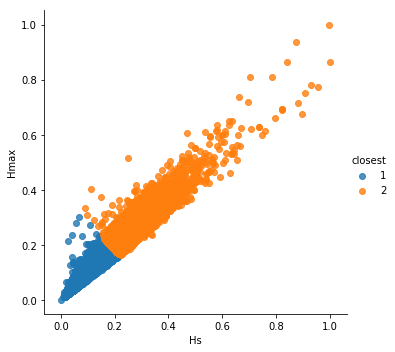

In [65]:
hs_hmax_dir_tp_months_sst_months_plot, wss1=do_kmeans(normalised_wavedata_dir_tp_months_sst_months, 'Hs', 'Hmax')
sns.lmplot('Hs', 'Hmax', data=hs_hmax_dir_tp_months_sst_months_plot, fit_reg=False, hue='closest')

Plot 1 - time elapsed - 3.9062235355377197 - total time elapsed - 3.9062235355377197 - wss - 0.4374742741286837
Plot 2 - time elapsed - 3.826218605041504 - total time elapsed - 7.732442140579224 - wss - 0.4374742741286837
Plot 3 - time elapsed - 3.6672096252441406 - total time elapsed - 11.399651765823364 - wss - 0.0108052878780117
Plot 4 - time elapsed - 3.7702157497406006 - total time elapsed - 15.169867515563965 - wss - 0.0108052878780117
Plot 5 - time elapsed - 3.835219144821167 - total time elapsed - 19.005086660385132 - wss - 0.46871680149501804
Plot 6 - time elapsed - 3.7932167053222656 - total time elapsed - 22.798303365707397 - wss - 0.46034357922776753
Plot 7 - time elapsed - 3.7872164249420166 - total time elapsed - 26.585519790649414 - wss - 0.4986842859415627
Plot 8 - time elapsed - 3.7982170581817627 - total time elapsed - 30.383736848831177 - wss - 0.022733486883429924
Plot 9 - time elapsed - 3.7522146701812744 - total time elapsed - 34.13595151901245 - wss - 0.468716801

Plot 74 - time elapsed - 4.662266969680786 - total time elapsed - 304.8164339065552 - wss - 0.17722666503510456
Plot 75 - time elapsed - 5.049288749694824 - total time elapsed - 309.86572265625 - wss - 0.23344933799313583
0.05368859362106331
Plot 76 - time elapsed - 4.430253505706787 - total time elapsed - 314.2959761619568 - wss - 0.24267533032793365
Plot 77 - time elapsed - 5.41530966758728 - total time elapsed - 319.71128582954407 - wss - 0.29871755603510947
Plot 78 - time elapsed - 4.426253318786621 - total time elapsed - 324.1375391483307 - wss - 0.07789313897097108
Plot 79 - time elapsed - 4.726270437240601 - total time elapsed - 328.8638095855713 - wss - 0.3333578210747769
Plot 80 - time elapsed - 4.3762500286102295 - total time elapsed - 333.2400596141815 - wss - 0.24475222966906432
Plot 81 - time elapsed - 5.294302701950073 - total time elapsed - 338.5343623161316 - wss - 0.230129330298842
Plot 82 - time elapsed - 5.246300220489502 - total time elapsed - 343.7806625366211 - ws

Plot 147 - time elapsed - 5.18329644203186 - total time elapsed - 745.5676431655884 - wss - 0.4227299475649692
Plot 148 - time elapsed - 5.295302867889404 - total time elapsed - 750.8629460334778 - wss - 0.324105775619016
Plot 149 - time elapsed - 5.660323619842529 - total time elapsed - 756.5232696533203 - wss - 0.43306289052214925
Plot 150 - time elapsed - 4.867278337478638 - total time elapsed - 761.390547990799 - wss - 0.23039574497097132
0.19970311603954893
Plot 151 - time elapsed - 5.091291189193726 - total time elapsed - 766.4818391799927 - wss - 0.28909803472738826
Plot 152 - time elapsed - 4.818275690078735 - total time elapsed - 771.3001148700714 - wss - 0.2268957807179488
Plot 153 - time elapsed - 4.787273645401001 - total time elapsed - 776.0873885154724 - wss - 0.3191324366063249
Plot 154 - time elapsed - 4.8352766036987305 - total time elapsed - 780.9226651191711 - wss - 0.33473405611292956
Plot 155 - time elapsed - 4.89628005027771 - total time elapsed - 785.818945169448

Plot 220 - time elapsed - 5.737328052520752 - total time elapsed - 1122.0911786556244 - wss - 0.42076743735171696
Plot 221 - time elapsed - 5.7823309898376465 - total time elapsed - 1127.873509645462 - wss - 0.25731917933307824
Plot 222 - time elapsed - 6.3643639087677 - total time elapsed - 1134.2378735542297 - wss - 0.3367448900098756
Plot 223 - time elapsed - 6.600377798080444 - total time elapsed - 1140.8382513523102 - wss - 0.26078424878204043
Plot 224 - time elapsed - 6.584376573562622 - total time elapsed - 1147.4226279258728 - wss - 0.3759969300329534
Plot 225 - time elapsed - 5.421310186386108 - total time elapsed - 1152.843938112259 - wss - 0.23514402695551273
0.21162699680134942
Total time elapsed - 1152.843938112259


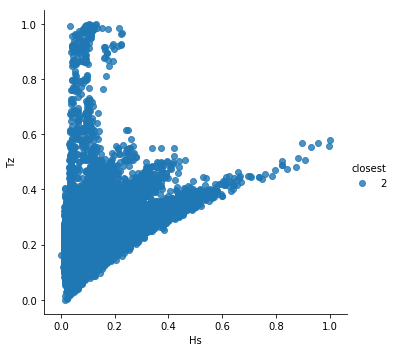

In [66]:
hs_tz_dir_tp_months_sst_months_plot, wss2=do_kmeans(normalised_wavedata_dir_tp_months_sst_months, 'Hs', 'Tz')
sns.lmplot('Hs', 'Tz', data=hs_tz_dir_tp_months_sst_months_plot, fit_reg=False, hue='closest')

Plot 1 - time elapsed - 5.168295860290527 - total time elapsed - 5.168295860290527 - wss - 0.45091589443011065
Plot 2 - time elapsed - 4.412252426147461 - total time elapsed - 9.580548286437988 - wss - 0.45091589443011065
Plot 3 - time elapsed - 4.083233594894409 - total time elapsed - 13.663781881332397 - wss - 0.0368960759417886
Plot 4 - time elapsed - 4.110234975814819 - total time elapsed - 17.774016857147217 - wss - 0.4255091422594976
Plot 5 - time elapsed - 3.8632211685180664 - total time elapsed - 21.637238025665283 - wss - 0.5586595098739114
Plot 6 - time elapsed - 3.8652210235595703 - total time elapsed - 25.502459049224854 - wss - 0.5352684001779728
Plot 7 - time elapsed - 3.9042234420776367 - total time elapsed - 29.40668249130249 - wss - 0.5104175330046101
Plot 8 - time elapsed - 3.7522146701812744 - total time elapsed - 33.158897161483765 - wss - 0.03668458562931821
Plot 9 - time elapsed - 3.928224802017212 - total time elapsed - 37.08712196350098 - wss - 0.533776213222659

Plot 74 - time elapsed - 5.065289735794067 - total time elapsed - 315.8290636539459 - wss - 0.2834775555098369
Plot 75 - time elapsed - 4.202240467071533 - total time elapsed - 320.03130412101746 - wss - 0.38844180550442237
0.08253783422832664
Plot 76 - time elapsed - 4.441253900527954 - total time elapsed - 324.4725580215454 - wss - 0.33955989872232145
Plot 77 - time elapsed - 4.622264385223389 - total time elapsed - 329.0948224067688 - wss - 0.4348827248032235
Plot 78 - time elapsed - 4.412252426147461 - total time elapsed - 333.50707483291626 - wss - 0.11710251533010572
Plot 79 - time elapsed - 4.706269025802612 - total time elapsed - 338.2133438587189 - wss - 0.26556477395530087
Plot 80 - time elapsed - 4.56226110458374 - total time elapsed - 342.7756049633026 - wss - 0.26547711012848685
Plot 81 - time elapsed - 4.401251792907715 - total time elapsed - 347.1768567562103 - wss - 0.19669785268151455
Plot 82 - time elapsed - 4.384250640869141 - total time elapsed - 351.56110739707947 

Plot 147 - time elapsed - 4.52725887298584 - total time elapsed - 655.1234710216522 - wss - 0.4520123110840539
Plot 148 - time elapsed - 4.3772501945495605 - total time elapsed - 659.5007212162018 - wss - 0.26442009022931245
Plot 149 - time elapsed - 4.528259038925171 - total time elapsed - 664.028980255127 - wss - 0.35055460314457804
Plot 150 - time elapsed - 4.434253692626953 - total time elapsed - 668.4632339477539 - wss - 0.2539151744762217
0.2091415590778622
Plot 151 - time elapsed - 4.763272285461426 - total time elapsed - 673.2265062332153 - wss - 0.2276620398300135
Plot 152 - time elapsed - 4.736271142959595 - total time elapsed - 677.9627773761749 - wss - 0.2091415590778622
Plot 153 - time elapsed - 4.663266897201538 - total time elapsed - 682.6260442733765 - wss - 0.37979496007826974
Plot 154 - time elapsed - 4.888279438018799 - total time elapsed - 687.5143237113953 - wss - 0.28396877101336654
Plot 155 - time elapsed - 4.755271911621094 - total time elapsed - 692.26959562301

Plot 220 - time elapsed - 5.046288251876831 - total time elapsed - 1008.2176673412323 - wss - 0.3513877924685152
Plot 221 - time elapsed - 4.8392767906188965 - total time elapsed - 1013.0569441318512 - wss - 0.3467984162873064
Plot 222 - time elapsed - 5.104291677474976 - total time elapsed - 1018.1612358093262 - wss - 0.307572024198364
Plot 223 - time elapsed - 4.920281410217285 - total time elapsed - 1023.0815172195435 - wss - 0.22753946056452679
Plot 224 - time elapsed - 4.852277517318726 - total time elapsed - 1027.9337947368622 - wss - 0.32253872717556864
Plot 225 - time elapsed - 4.980284929275513 - total time elapsed - 1032.9140796661377 - wss - 0.25827552725450603
0.22753946056452679
Total time elapsed - 1032.9140796661377


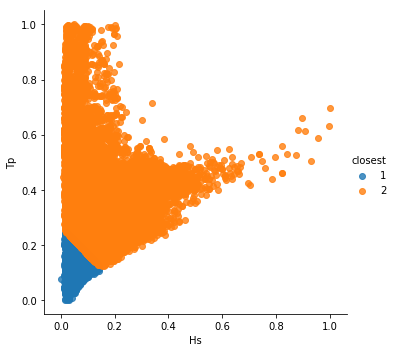

In [67]:
hs_tp_dir_tp_months_sst_months_plot, wss3=do_kmeans(normalised_wavedata_dir_tp_months_sst_months, 'Hs', 'Tp')
sns.lmplot('Hs', 'Tp', data=hs_tp_dir_tp_months_sst_months_plot, fit_reg=False, hue='closest')

Plot 1 - time elapsed - 3.7602152824401855 - total time elapsed - 3.7602152824401855 - wss - 0.0723525846954024
Plot 2 - time elapsed - 3.7832164764404297 - total time elapsed - 7.543431758880615 - wss - 0.0723525846954024
Plot 3 - time elapsed - 3.705211877822876 - total time elapsed - 11.248643636703491 - wss - 0.0723525846954024
Plot 4 - time elapsed - 3.7432141304016113 - total time elapsed - 14.991857767105103 - wss - 0.0723525846954024
Plot 5 - time elapsed - 3.729213237762451 - total time elapsed - 18.721071004867554 - wss - 0.6394871679147376
Plot 6 - time elapsed - 3.808217763900757 - total time elapsed - 22.52928876876831 - wss - 0.6543908764219277
Plot 7 - time elapsed - 3.7532145977020264 - total time elapsed - 26.282503366470337 - wss - 0.547925818851505
Plot 8 - time elapsed - 3.840219736099243 - total time elapsed - 30.12272310256958 - wss - 0.060538078980652874
Plot 9 - time elapsed - 3.7622151374816895 - total time elapsed - 33.88493824005127 - wss - 0.540993420200879


Plot 74 - time elapsed - 4.277244567871094 - total time elapsed - 293.85980772972107 - wss - 0.4376028632911397
Plot 75 - time elapsed - 4.061232328414917 - total time elapsed - 297.921040058136 - wss - 0.4509220799685513
0.06517925252911536
Plot 76 - time elapsed - 4.448254585266113 - total time elapsed - 302.3692946434021 - wss - 0.06532651298659674
Plot 77 - time elapsed - 4.221241235733032 - total time elapsed - 306.59053587913513 - wss - 0.4269885977604426
Plot 78 - time elapsed - 4.208240985870361 - total time elapsed - 310.7987768650055 - wss - 0.09743793726535929
Plot 79 - time elapsed - 4.178238868713379 - total time elapsed - 314.9770157337189 - wss - 0.09510888545788035
Plot 80 - time elapsed - 4.521258592605591 - total time elapsed - 319.49827432632446 - wss - 0.060178573705063174
Plot 81 - time elapsed - 4.162237882614136 - total time elapsed - 323.6605122089386 - wss - 0.40453194146792487
Plot 82 - time elapsed - 4.2512431144714355 - total time elapsed - 327.9117553234100

Plot 147 - time elapsed - 4.46025538444519 - total time elapsed - 614.4371435642242 - wss - 0.603804483727704
Plot 148 - time elapsed - 4.4902567863464355 - total time elapsed - 618.9274003505707 - wss - 0.1966913316212733
Plot 149 - time elapsed - 4.496257066726685 - total time elapsed - 623.4236574172974 - wss - 0.4937261262117239
Plot 150 - time elapsed - 4.619264364242554 - total time elapsed - 628.0429217815399 - wss - 0.33979108331173147
0.11000123159962744
Plot 151 - time elapsed - 4.701269149780273 - total time elapsed - 632.7441909313202 - wss - 0.11198270822192195
Plot 152 - time elapsed - 4.592262268066406 - total time elapsed - 637.3364531993866 - wss - 0.4698558389116182
Plot 153 - time elapsed - 4.467255592346191 - total time elapsed - 641.8037087917328 - wss - 0.43627196357509745
Plot 154 - time elapsed - 4.926281929016113 - total time elapsed - 646.7299907207489 - wss - 0.11508072113211071
Plot 155 - time elapsed - 4.654266357421875 - total time elapsed - 651.3842570781

Plot 220 - time elapsed - 5.042288303375244 - total time elapsed - 967.0823147296906 - wss - 0.6096198520140224
Plot 221 - time elapsed - 5.3243043422698975 - total time elapsed - 972.4066190719604 - wss - 0.5427989304738913
Plot 222 - time elapsed - 4.935282230377197 - total time elapsed - 977.3419013023376 - wss - 0.6017587039815687
Plot 223 - time elapsed - 4.784273624420166 - total time elapsed - 982.1261749267578 - wss - 0.10299749791576095
Plot 224 - time elapsed - 5.046288728713989 - total time elapsed - 987.1724636554718 - wss - 0.5001845501970635
Plot 225 - time elapsed - 5.161295413970947 - total time elapsed - 992.3337590694427 - wss - 0.34510717815012093
0.10299749791576095
Total time elapsed - 992.3337590694427


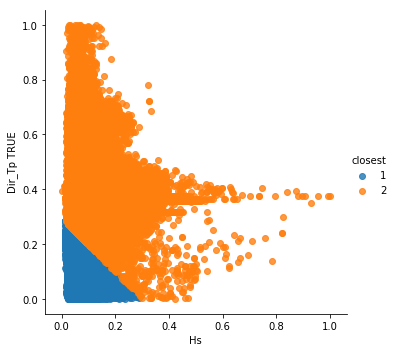

In [68]:
hs_dir_tp_dir_tp_months_sst_months_plot, wss4=do_kmeans(normalised_wavedata_dir_tp_months_sst_months, 'Hs', 'Dir_Tp TRUE')
sns.lmplot('Hs', 'Dir_Tp TRUE', data=hs_dir_tp_dir_tp_months_sst_months_plot, fit_reg=False, hue='closest')

Plot 1 - time elapsed - 3.963226556777954 - total time elapsed - 3.963226556777954 - wss - 0.44604477623435257
Plot 2 - time elapsed - 3.8822219371795654 - total time elapsed - 7.8454484939575195 - wss - 0.4447467001522657
Plot 3 - time elapsed - 3.8762216567993164 - total time elapsed - 11.721670150756836 - wss - 0.15087460150260798
Plot 4 - time elapsed - 3.8852221965789795 - total time elapsed - 15.606892347335815 - wss - 0.4730335878027303
Plot 5 - time elapsed - 3.8652212619781494 - total time elapsed - 19.472113609313965 - wss - 0.4421603631991058
Plot 6 - time elapsed - 3.839219570159912 - total time elapsed - 23.311333179473877 - wss - 0.4251977423883193
Plot 7 - time elapsed - 4.052232027053833 - total time elapsed - 27.36356520652771 - wss - 0.45519970454976194
Plot 8 - time elapsed - 3.8472201824188232 - total time elapsed - 31.210785388946533 - wss - 0.15564046042779703
Plot 9 - time elapsed - 3.8662209510803223 - total time elapsed - 35.077006340026855 - wss - 0.4521614110

Plot 74 - time elapsed - 4.22724175453186 - total time elapsed - 296.3249480724335 - wss - 0.3174612525461246
Plot 75 - time elapsed - 4.09023380279541 - total time elapsed - 300.4151818752289 - wss - 0.2543444002568481
0.20536067686168222
Plot 76 - time elapsed - 4.3552491664886475 - total time elapsed - 304.77043104171753 - wss - 0.29123305469508315
Plot 77 - time elapsed - 4.406251907348633 - total time elapsed - 309.17668294906616 - wss - 0.40391676274732435
Plot 78 - time elapsed - 4.218241214752197 - total time elapsed - 313.39492416381836 - wss - 0.22413990258374356
Plot 79 - time elapsed - 4.356249094009399 - total time elapsed - 317.75117325782776 - wss - 0.2952654209351061
Plot 80 - time elapsed - 4.3552491664886475 - total time elapsed - 322.1064224243164 - wss - 0.24306207292403204
Plot 81 - time elapsed - 4.206240892410278 - total time elapsed - 326.3126633167267 - wss - 0.24421247229817547
Plot 82 - time elapsed - 4.3772501945495605 - total time elapsed - 330.689913511276

Plot 147 - time elapsed - 4.694268465042114 - total time elapsed - 625.661785364151 - wss - 0.3316188459501418
Plot 148 - time elapsed - 4.675267457962036 - total time elapsed - 630.337052822113 - wss - 0.3177630307215046
Plot 149 - time elapsed - 4.654266119003296 - total time elapsed - 634.9913189411163 - wss - 0.3263224108389455
Plot 150 - time elapsed - 4.775273084640503 - total time elapsed - 639.7665920257568 - wss - 0.32513832090926753
0.22148186385410817
Plot 151 - time elapsed - 4.813275337219238 - total time elapsed - 644.5798673629761 - wss - 0.27149031968081133
Plot 152 - time elapsed - 4.820275545120239 - total time elapsed - 649.4001429080963 - wss - 0.24111371550349953
Plot 153 - time elapsed - 4.602263450622559 - total time elapsed - 654.0024063587189 - wss - 0.3845732085575069
Plot 154 - time elapsed - 4.719269752502441 - total time elapsed - 658.7216761112213 - wss - 0.30778251202052165
Plot 155 - time elapsed - 4.735270738601685 - total time elapsed - 663.45694684982

Plot 220 - time elapsed - 5.041288137435913 - total time elapsed - 984.0442838668823 - wss - 0.3059842568461883
Plot 221 - time elapsed - 4.981284856796265 - total time elapsed - 989.0255687236786 - wss - 0.2562261422454692
Plot 222 - time elapsed - 4.980284690856934 - total time elapsed - 994.0058534145355 - wss - 0.39036473523915804
Plot 223 - time elapsed - 4.875278949737549 - total time elapsed - 998.8811323642731 - wss - 0.2412016967498165
Plot 224 - time elapsed - 5.2002973556518555 - total time elapsed - 1004.0814297199249 - wss - 0.3489654620839309
Plot 225 - time elapsed - 5.227299213409424 - total time elapsed - 1009.3087289333344 - wss - 0.32750408199101133
0.22326204563685548
Total time elapsed - 1009.3087289333344


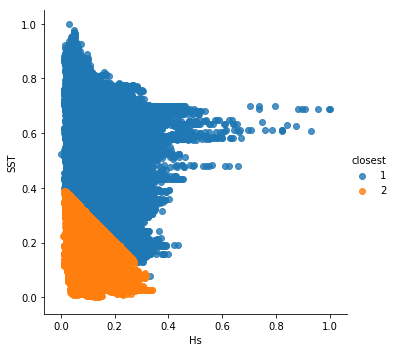

In [69]:
hs_sst_dir_tp_months_sst_months_plot, wss5=do_kmeans(normalised_wavedata_dir_tp_months_sst_months, 'Hs', 'SST')
sns.lmplot('Hs', 'SST', data=hs_sst_dir_tp_months_sst_months_plot, fit_reg=False, hue='closest')